In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

data = yf.download('NVDA')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037618,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041559,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038334,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038215,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038095,227520000
...,...,...,...,...,...,...
2024-10-02,116.440002,119.379997,115.139999,118.849998,118.849998,221845900
2024-10-03,120.919998,124.360001,120.339996,122.849998,122.849998,277118000
2024-10-04,124.940002,125.040001,121.830002,124.919998,124.919998,243678100


In [3]:
log_returns = np.log(1+data['Adj Close'].pct_change()) # logarithmic returns
log_returns

Date
1999-01-22         NaN
1999-01-25    0.099631
1999-01-26   -0.080769
1999-01-27   -0.003115
1999-01-28   -0.003149
                ...   
2024-10-02    0.015688
2024-10-03    0.033102
2024-10-04    0.016709
2024-10-07    0.022167
2024-10-08    0.039681
Name: Adj Close, Length: 6470, dtype: float64

In [4]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
drift # the expected periodic daily rate of return

np.float64(0.0005514885494594168)

In [5]:
stdev = log_returns.std()
days = 50
trials = 100
# a matrix shape(days, trials) filled with random numbers sampled from a standard normal distribution
Z = norm.ppf(np.random.rand(days, trials))
# multiply each value in the Z matrix by the standard deviation and add drift. Then exponentiate using np.exp to obtain the daily returns.
daily_returns = np.exp(np.array(drift) + np.array(stdev) * Z)
daily_returns

array([[0.97406579, 1.02906196, 0.94665731, ..., 0.92690055, 1.003694  ,
        0.94313322],
       [0.99113668, 0.99482644, 1.0593321 , ..., 1.00140289, 1.01653322,
        0.97478993],
       [0.98250584, 0.98203083, 0.97995734, ..., 0.97138242, 1.01023477,
        1.03850204],
       ...,
       [1.01813912, 1.01383163, 0.96295866, ..., 0.97632959, 1.03700242,
        1.02307845],
       [0.99476977, 1.02974133, 1.03807488, ..., 1.02748687, 1.00802724,
        1.00346923],
       [1.02644858, 0.95878132, 1.05317353, ..., 1.10563742, 1.04216389,
        0.98423759]])

In [6]:
# multiply the previous day’s price with the daily return to simulate the price change for each day, with random nature of daily returns.
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data['Adj Close'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]
price_paths

array([[132.88999939, 132.88999939, 132.88999939, ..., 132.88999939,
        132.88999939, 132.88999939],
       [131.7121532 , 132.20248523, 140.7746426 , ..., 133.07642883,
        135.08709936, 129.53983359],
       [129.40795939, 129.82691673, 137.95314408, ..., 129.26810304,
        136.46968469, 134.52738102],
       ...,
       [134.24781992, 112.5929795 , 177.56680513, ..., 117.60465869,
        111.39498323, 119.48760948],
       [133.545673  , 115.94164411, 184.32763981, ..., 120.83724288,
        112.28917799, 119.9021389 ],
       [137.07776699, 111.16268252, 194.12899198, ..., 133.60217779,
        117.02372699, 118.01219221]])

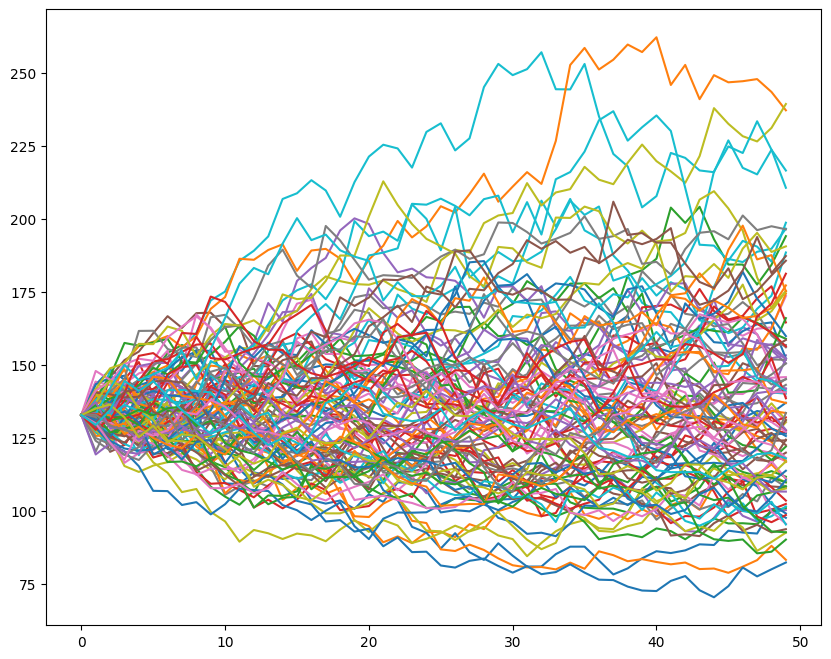

In [7]:
# plot the paths
plt.figure(figsize=[10,8])
plt.plot(price_paths)
#simulated stock price for the next 50 days of NVDA based on previous volatility